In [ ]:
import numpy as np
import pandas as pd
import kagglehub
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC


In [ ]:
path = kagglehub.dataset_download("sampadab17/network-intrusion-detection")

print("Path to dataset files:", path)



Using Colab cache for faster access to the 'network-intrusion-detection' dataset.
Path to dataset files: /kaggle/input/network-intrusion-detection


# **4.1 Data Cleaning and 4.2 Exploratory Data Analysis**

In [ ]:
training_data = pd.read_csv('/kaggle/input/network-intrusion-detection/Train_data.csv')
testing_data = pd.read_csv('/kaggle/input/network-intrusion-detection/Test_data.csv')

training_data.head(5)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [ ]:
training_data.shape

(25192, 42)

In [ ]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [ ]:
training_data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
training_data.isna().sum().sum()

np.int64(0)

In [ ]:
training_data.duplicated().sum()

np.int64(0)

In [ ]:
training_data.describe(include='object')


,protocol_type,service,flag,class
count,25192,25192,25192,25192
unique,3,66,11,2
top,tcp,http,SF,normal
freq,20526,8003,14973,13449


<Axes: >

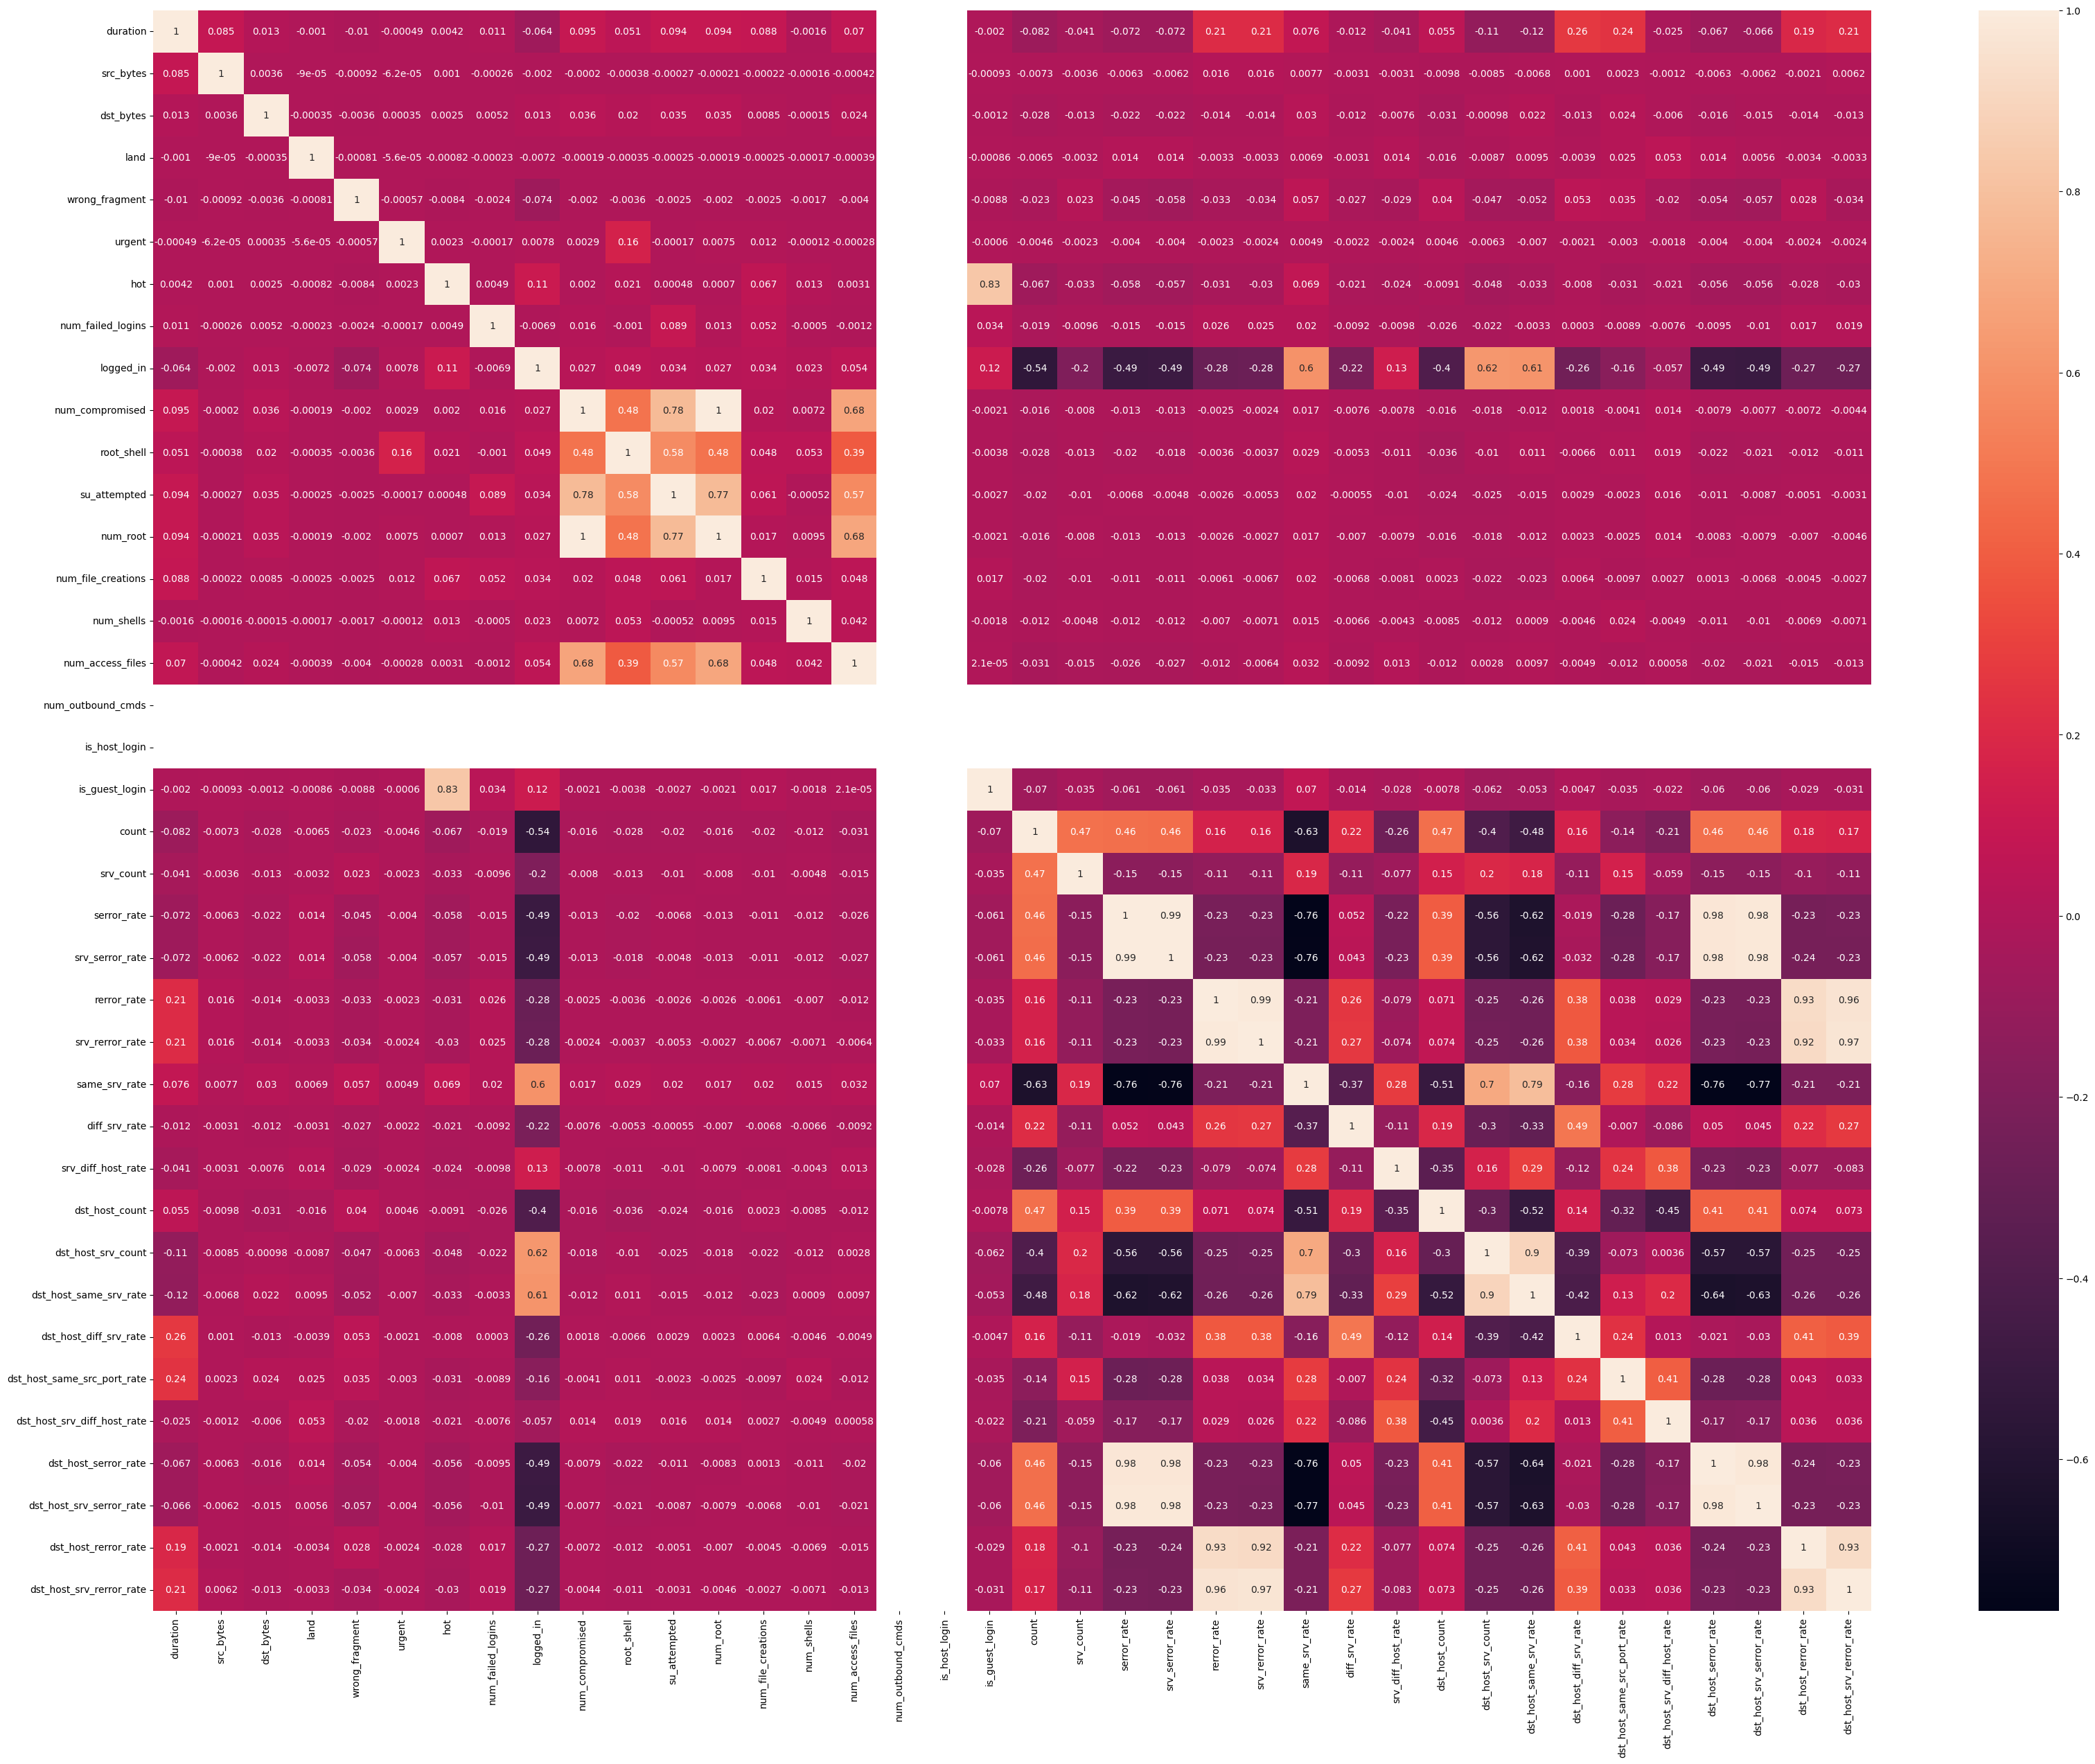

In [ ]:
numeric_data = training_data.select_dtypes(include=np.number)
plt.figure(figsize=(40,30))
sns.heatmap(numeric_data.corr(), annot=True)


In [ ]:
training_data.drop(['num_outbound_cmds'], axis=1, inplace=True)
testing_data.drop(['num_outbound_cmds'], axis=1, inplace=True)
training_data.drop(['is_host_login'], axis=1, inplace=True)
testing_data.drop(['is_host_login'], axis=1, inplace=True)

<Axes: xlabel='class', ylabel='duration'>

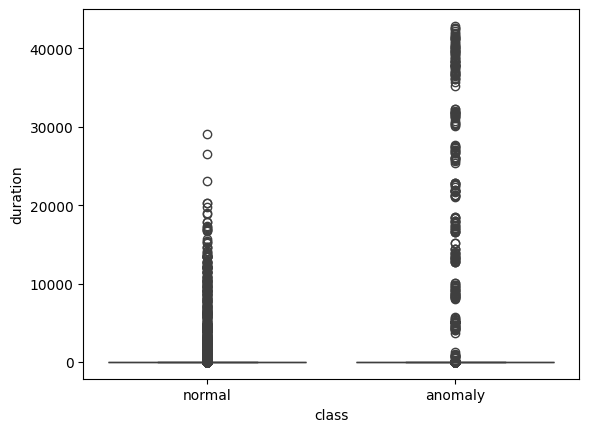

In [ ]:
sns.boxplot(x='class', y='duration', data=training_data)

([<matplotlib.patches.Wedge at 0x7cb75ca8b7a0>,
 [Text(-0.11679118878410556, 1.093782344994833, 'normal'),
  Text(0.11679115401658254, -1.0937823487072167, 'anomaly')])

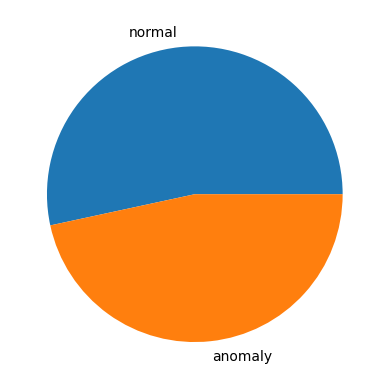

In [ ]:
plt.pie(training_data['class'].value_counts(), labels=training_data['class'].value_counts().index)

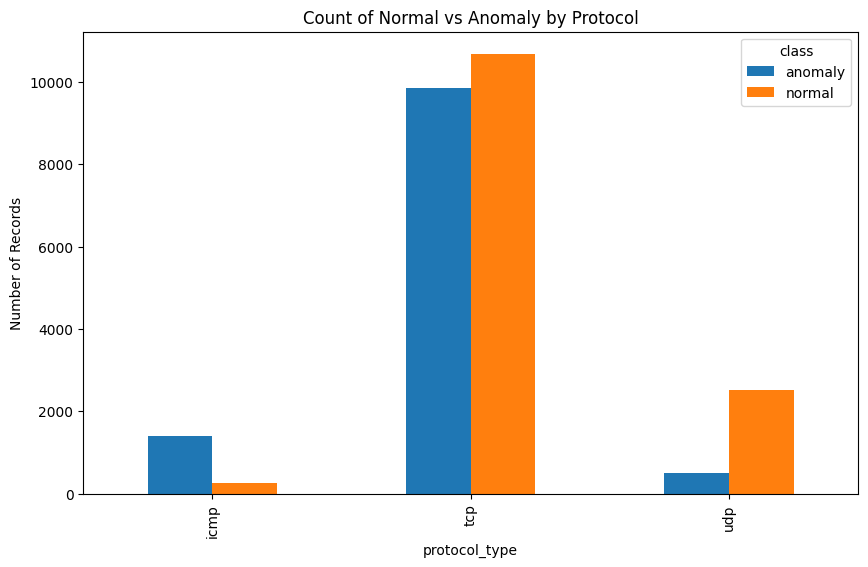

In [ ]:
protocol_counts = training_data.groupby(['protocol_type','class']).size().unstack(fill_value=0)
protocol_counts.plot(kind='bar', figsize=(10,6))
plt.title('Count of Normal vs Anomaly by Protocol')
plt.ylabel('Number of Records')
plt.show()

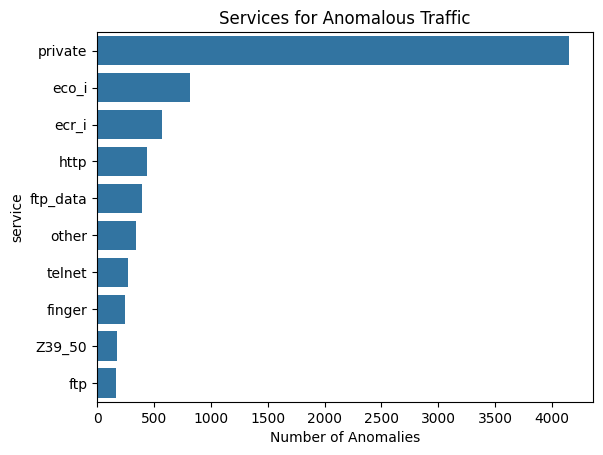

In [ ]:
anomalies = training_data[training_data['class'] == 'anomaly']
top_anomaly_services = anomalies['service'].value_counts().nlargest(10)
sns.barplot(x=top_anomaly_services.values, y=top_anomaly_services.index)
plt.title('Services for Anomalous Traffic')
plt.xlabel('Number of Anomalies')
plt.show()

same_srv_rate                  0.749237
dst_host_srv_count             0.719292
dst_host_same_srv_rate         0.692212
logged_in                      0.688084
dst_host_srv_serror_rate       0.653759
dst_host_serror_rate           0.651050
serror_rate                    0.649952
srv_serror_rate                0.647817
count                          0.578790
dst_host_count                 0.368828
dst_host_srv_rerror_rate       0.256999
rerror_rate                    0.256858
dst_host_rerror_rate           0.256312
srv_rerror_rate                0.256152
dst_host_diff_srv_rate         0.238170
diff_srv_rate                  0.193528
srv_diff_host_rate             0.120649
wrong_fragment                 0.097625
dst_host_same_src_port_rate    0.092974
dst_host_srv_diff_host_rate    0.062928
duration                       0.050901
is_guest_login                 0.038662
num_access_files               0.036999
su_attempted                   0.025851
num_root                       0.019753


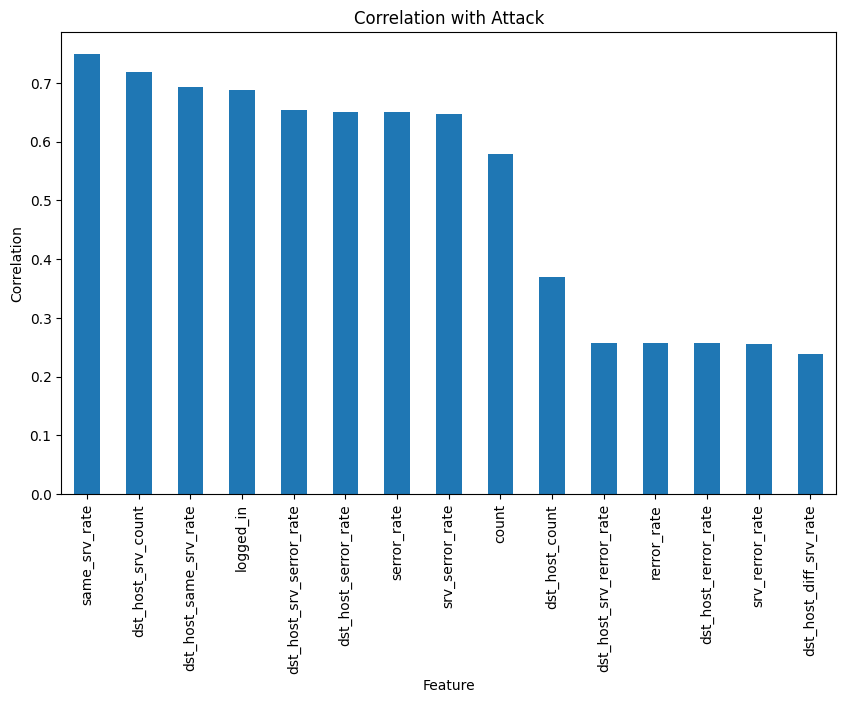

In [ ]:
numerical = training_data.select_dtypes(include=np.number).columns

training_data["class_binary"] = training_data["class"].map({
    "normal": 0,
    "anomaly": 1
})

corr = training_data[numerical].corrwith(
    training_data["class_binary"]
).abs().sort_values(ascending=False)

training_data.drop("class_binary", axis=1, inplace=True)
print(corr)

plt.figure(figsize=(10, 6))
corr.head(15).plot(kind="bar")
plt.title("Correlation with Attack")
plt.ylabel("Correlation")
plt.xlabel("Feature")
plt.show()

**Flag Analysis**

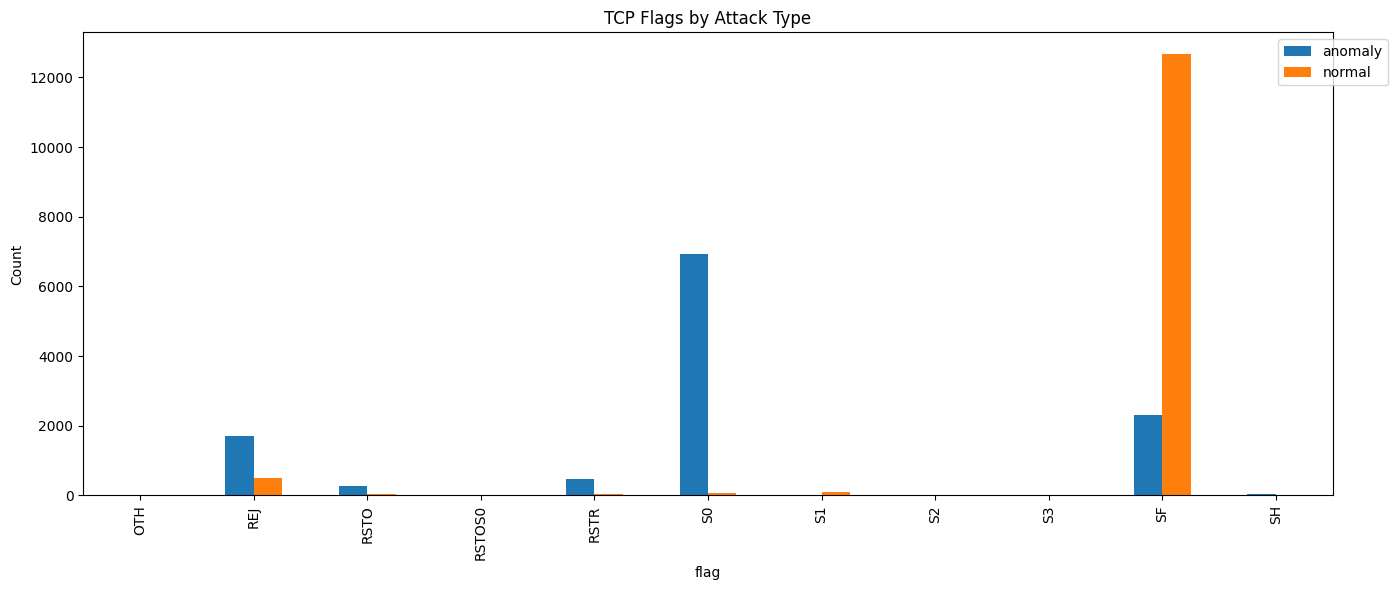

In [ ]:
flag_attack = pd.crosstab(training_data['flag'],
                          training_data['class'])
flag_attack.plot(kind='bar', figsize=(14, 6))
plt.title('TCP Flags by Attack Type')
plt.ylabel('Count')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

**Statistical Summary by Class**

In [ ]:
# Compare normal vs anomaly statistics
numeric_cols = training_data.select_dtypes(include=np.number).columns
summary = training_data.groupby('class')[numeric_cols].agg(['mean', 'median', 'std'])
print(summary)

           duration                         src_bytes                       \
               mean median          std          mean median           std   
class                                                                        
anomaly  451.397002    0.0  3670.436908  39146.190667    0.0  3.526514e+06   
normal   177.274742    0.0  1312.251967  11394.413637  234.0  1.676070e+05   

           dst_bytes                            land  ...  \
                mean median            std      mean  ...   
class                                                 ...   
anomaly  2450.980158    0.0  106519.049696  0.000085  ...   
normal   4400.680645  382.0   69804.368471  0.000074  ...   

        dst_host_serror_rate dst_host_srv_serror_rate                   \
                         std                     mean median       std   
class                                                                    
anomaly             0.484470                 0.591931    1.0  0.489618   
normal 

**Feature Importance**

Training Random Forest for feature importance...

Top 20 Most Important Features:
                        feature  importance
1                     src_bytes    0.256464
2                     dst_bytes    0.116563
23                same_srv_rate    0.081327
28       dst_host_same_srv_rate    0.073399
27           dst_host_srv_count    0.052346
8                     logged_in    0.049030
30  dst_host_same_src_port_rate    0.044088
29       dst_host_diff_srv_rate    0.039709
24                diff_srv_rate    0.037271
17                        count    0.033015
31  dst_host_srv_diff_host_rate    0.023945
32         dst_host_serror_rate    0.023718
18                    srv_count    0.022949
19                  serror_rate    0.021809
33     dst_host_srv_serror_rate    0.021278
20              srv_serror_rate    0.020971
26               dst_host_count    0.016703
34         dst_host_rerror_rate    0.011628
35     dst_host_srv_rerror_rate    0.011296
6                           hot    0.0

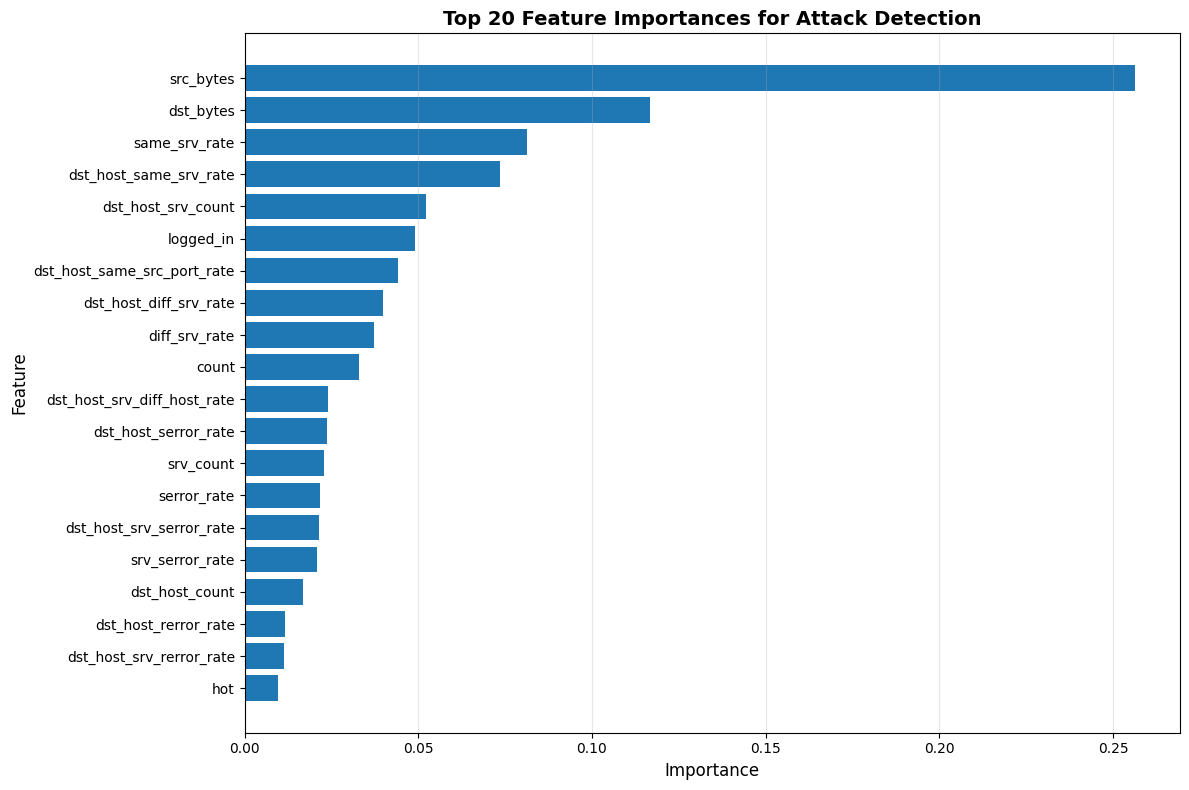

In [ ]:
# Get numerical features
numerical = training_data.select_dtypes(include=np.number).columns.tolist()

# CREATE class_binary again (you dropped it earlier)
training_data['class_binary'] = training_data['class'].map({
    'normal': 0,
    'anomaly': 1
})

# Prepare X and y
X = training_data[numerical]
y = training_data['class_binary']

# Train Random Forest
print("Training Random Forest for feature importance...")
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X, y)

# Get feature importances
feature_imp = pd.DataFrame({
    'feature': numerical,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

# Display top 20
print("\nTop 20 Most Important Features:")
print(feature_imp.head(20))

# Plot top 20 features
plt.figure(figsize=(12, 8))
top_20 = feature_imp.head(20)
plt.barh(top_20['feature'], top_20['importance'])
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Top 20 Feature Importances for Attack Detection',
          fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

**Multivariate Variation**

Top correlated features:
same_srv_rate               0.749237
dst_host_srv_count          0.719292
dst_host_same_srv_rate      0.692212
logged_in                   0.688084
dst_host_srv_serror_rate    0.653759
dst_host_serror_rate        0.651050
serror_rate                 0.649952
srv_serror_rate             0.647817
count                       0.578790
dst_host_count              0.368828
dtype: float64


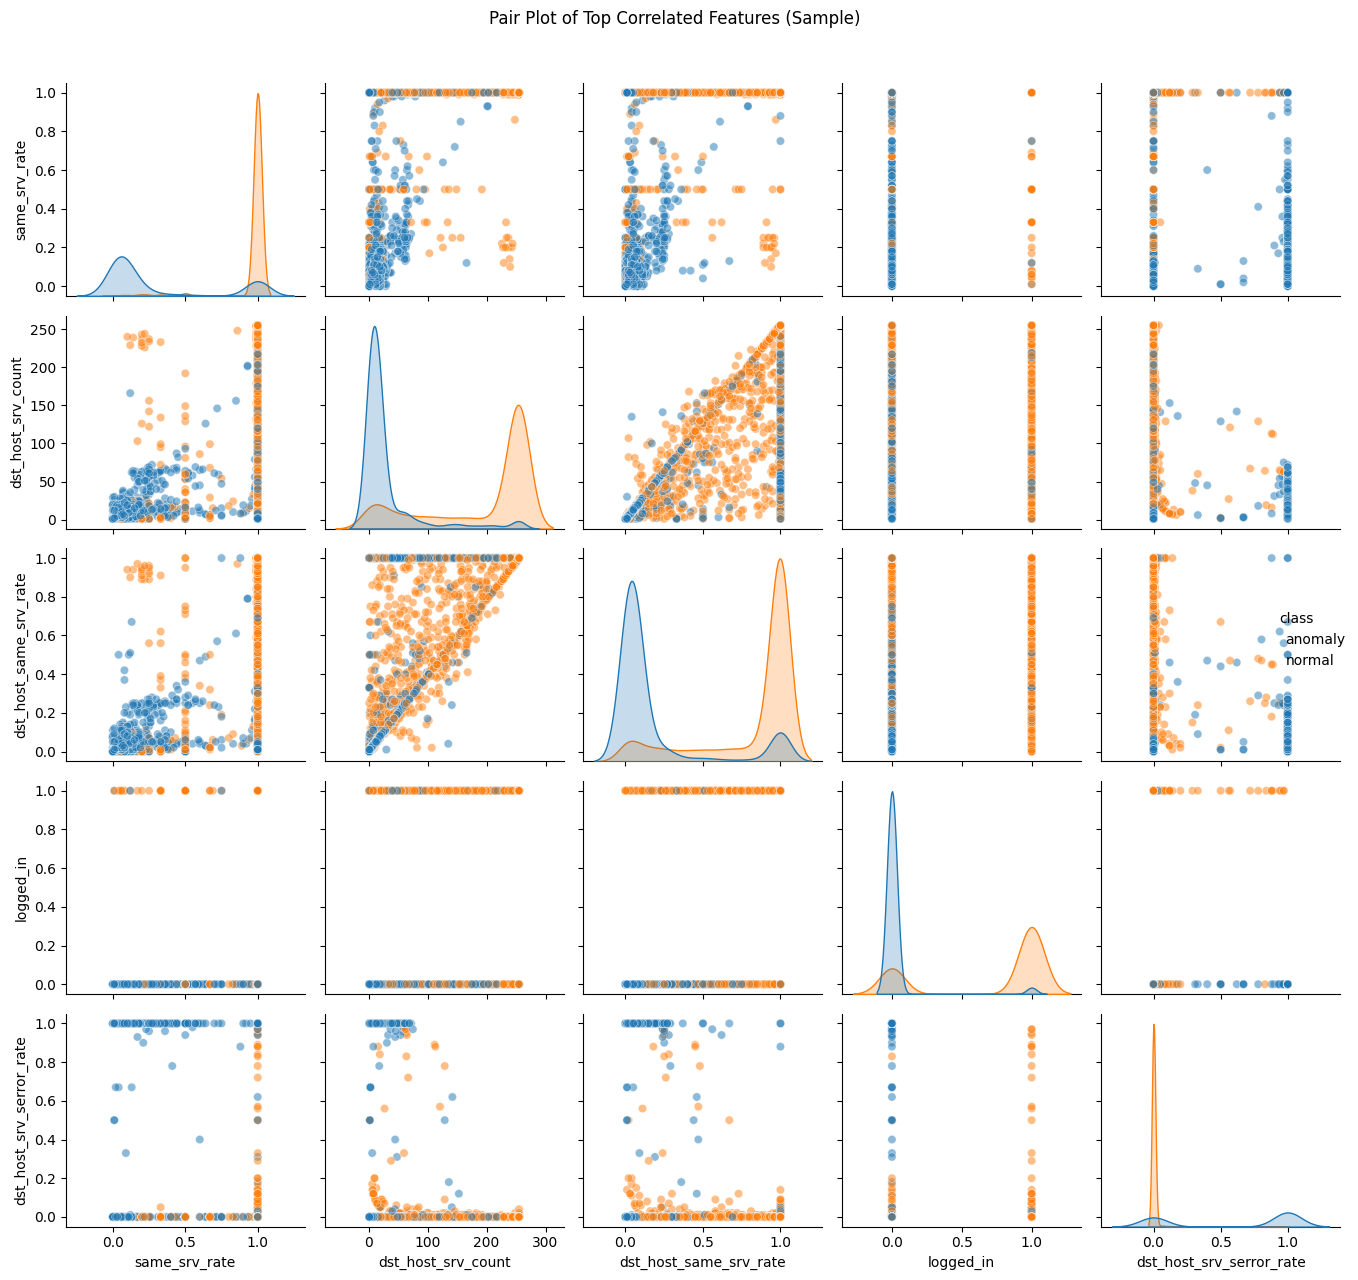

In [ ]:
#create the correlation matrix and save it to a variable
numerical = training_data.select_dtypes(include=np.number).columns

training_data['class_binary'] = training_data['class'].map({
    'normal': 0,
    'anomaly': 1
})

corr = training_data[numerical].corrwith(
    training_data['class_binary']
).abs().sort_values(ascending=False)

# Drop class_binary from the correlation results
training_data.drop('class_binary', axis=1, inplace=True)

print("Top correlated features:")
print(corr.head(10))

top_features = corr.head(5).index.tolist()

# Sample 5000 random rows (adjust based on your dataset size)
sample_data = training_data.sample(n=min(5000, len(training_data)), random_state=42)

# Create the pair plot with sampled data
sns.pairplot(sample_data[top_features + ['class']],
             hue='class',
             diag_kind='kde',
             plot_kws={'alpha': 0.5},
             height=2.5)
plt.suptitle('Pair Plot of Top Correlated Features (Sample)', y=1.02)
plt.tight_layout()
plt.show()

# **4.3 Feature Engineering**

In [ ]:
training_data["byte_ratio"] = training_data["src_bytes"] / (training_data["dst_bytes"] + 1)
testing_data["byte_ratio"] = testing_data["src_bytes"] / (testing_data["dst_bytes"] + 1)


In [ ]:
training_data["host_pressure"] = training_data["dst_host_srv_count"] * training_data["dst_host_same_srv_rate"]
testing_data["host_pressure"] = testing_data["dst_host_srv_count"] * testing_data["dst_host_same_srv_rate"]


In [ ]:
training_data["flag_freq"] = (training_data.groupby("flag")["flag"].transform("count") / len(training_data))
testing_data["flag_freq"] = (testing_data.groupby("flag")["flag"].transform("count") / len(testing_data))

In [ ]:
scaler = StandardScaler()
columns = training_data.select_dtypes(include=np.number).columns
train_scaled = scaler.fit_transform(training_data.select_dtypes(include=np.number))
test_scaled = scaler.transform(testing_data.select_dtypes(include=np.number))

train_scaled = pd.DataFrame(train_scaled, columns=columns)
test_scaled = pd.DataFrame(test_scaled, columns=columns)

In [ ]:
threshold = 0.95
low_var_cols = []

for col in training_data.columns:
    top_freq = training_data[col].value_counts(normalize=True, dropna=False).iloc[0]
    if top_freq >= threshold:
        low_var_cols.append(col)

print("Low variance columns:", low_var_cols)

Low variance columns: ['land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'is_guest_login']


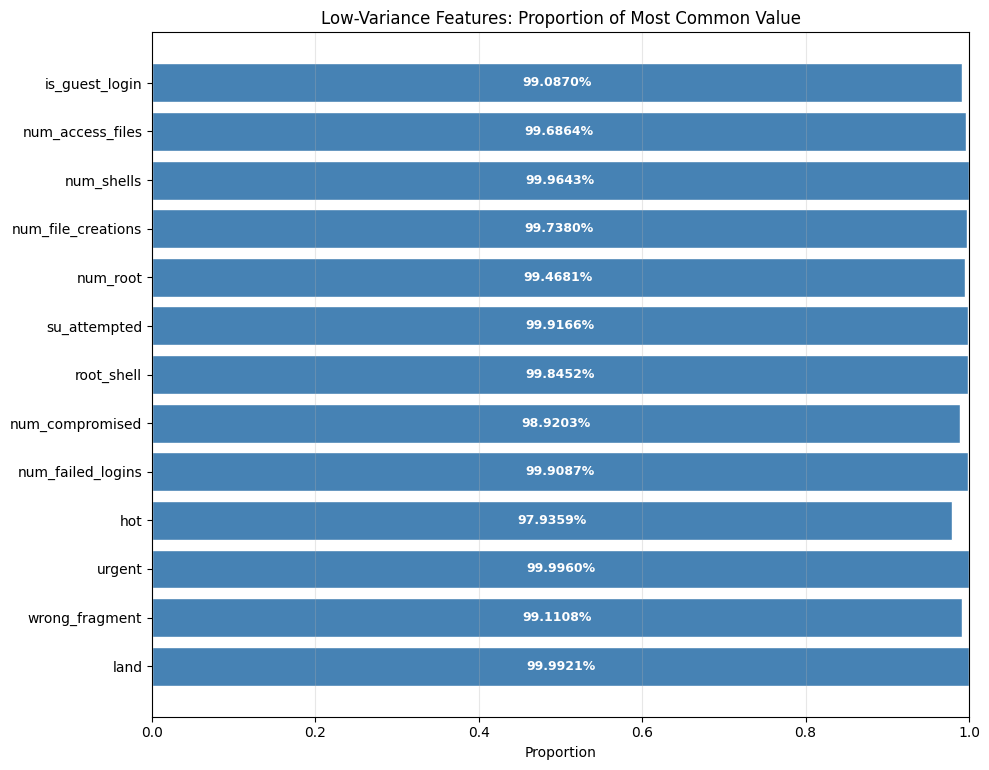

In [ ]:
def plot_low_variance(df, low_var_cols):
    if low_var_cols:
        fig, ax = plt.subplots(figsize=(10, max(4, len(low_var_cols) * 0.6)))

        dominant_props = []
        for col in low_var_cols:
            value_counts = df[col].value_counts(dropna=False, normalize=True)
            dominant_prop = value_counts.iloc[0]
            dominant_props.append(dominant_prop)

        y_pos = range(len(low_var_cols))

        bars = ax.barh(y_pos, dominant_props, color='steelblue', edgecolor='white')
        ax.set_yticks(y_pos)
        ax.set_yticklabels(low_var_cols)
        ax.set_xlabel('Proportion')
        ax.set_title('Low-Variance Features: Proportion of Most Common Value')
        ax.set_xlim([0, 1])
        ax.grid(axis='x', alpha=0.3)

        for i, dom in enumerate(dominant_props):
            ax.text(dom / 2, i, f'{dom:.4%}', ha='center', va='center', fontsize=9, color='white', fontweight='bold')

        plt.tight_layout()
        plt.show()
    else:
        print("No low-variance features found.")
plot_low_variance(training_data,low_var_cols)
training_data = training_data.drop(columns=low_var_cols)
testing_data  = testing_data.drop(columns=low_var_cols)

In [ ]:
train_cat_cols = training_data.select_dtypes(include=['object'])
test_cat_cols = testing_data.select_dtypes(include=['object'])
train_cat_cols

,protocol_type,service,flag,class
0,tcp,ftp_data,SF,normal
1,udp,other,SF,normal
2,tcp,private,S0,anomaly
3,tcp,http,SF,normal
4,tcp,http,SF,normal
...,...,...,...,...
25187,tcp,exec,RSTO,anomaly
25188,tcp,ftp_data,SF,anomaly
25189,tcp,private,REJ,anomaly
25190,tcp,nnsp,S0,anomaly


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('protocol_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('class').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('protocol_type')):
  _plot_series(series, series_name, i)
  fig.legend(title='protocol_type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('class')):
  _plot_series(series, series_name, i)
  fig.legend(title='class', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_5['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['class'].value_counts()
    for x_label, grp in _df_6.groupby('protocol_type')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('protocol_type')
_ = plt.ylabel('class')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_7['protocol_type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_7, x='index', y='protocol_type', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_8['class'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_8, x='index', y='class', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
enc = LabelEncoder()

train_cat_cols = train_cat_cols.apply(enc.fit_transform)
test_cat_cols = test_cat_cols.apply(enc.fit_transform)

In [ ]:
predict_y = training_data['class']
train_cat_cols = train_cat_cols.drop('class', axis=1)
predict_y

,class
0,normal
1,normal
2,anomaly
3,normal
4,normal
...,...
25187,anomaly
25188,anomaly
25189,anomaly
25190,anomaly


In [ ]:
x_train = pd.concat([train_scaled, train_cat_cols], axis=1)
x_train

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,byte_ratio,host_pressure,flag_freq,protocol_type,service,flag
0,-0.113551,-0.009889,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,...,-0.641804,-0.627365,-0.221668,-0.374281,-0.009209,-0.870042,0.781845,1,19,9
1,-0.113551,-0.010032,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,...,-0.641804,-0.627365,-0.385140,-0.374281,-0.009352,-0.907003,0.781845,2,41,9
2,-0.113551,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,...,1.603834,1.614454,-0.385140,-0.374281,-0.009413,-0.884392,-0.808677,1,46,5
3,-0.113551,-0.009996,0.052473,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,1.238197,-0.021873,...,-0.574435,-0.604947,-0.385140,-0.342768,-0.009413,1.310698,0.781845,1,22,9
4,-0.113551,-0.010010,-0.034582,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,1.238197,-0.021873,...,-0.641804,-0.627365,-0.385140,-0.374281,-0.009413,1.310698,0.781845,1,22,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,-0.113551,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,...,-0.641804,-0.627365,2.884296,2.777041,-0.009413,-0.905177,-2.147759,1,16,2
25188,-0.113551,-0.009954,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,1.238197,-0.021873,...,-0.641804,-0.627365,-0.385140,-0.374281,-0.009274,-0.567826,0.781845,1,19,9
25189,-0.113551,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,...,-0.641804,-0.627365,2.884296,2.777041,-0.009413,-0.901350,-1.765906,1,46,1
25190,-0.113551,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,...,1.603834,1.614454,-0.385140,-0.374281,-0.009413,-0.893088,-0.808677,1,38,5


In [ ]:
test = pd.concat([test_scaled, test_cat_cols], axis=1)
test

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,byte_ratio,host_pressure,flag_freq,protocol_type,service,flag
0,-0.113551,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,...,-0.641804,-0.627365,2.884296,2.777041,-0.009413,-0.903525,-1.349260,1,45,1
1,-0.113551,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,...,-0.641804,-0.627365,2.884296,2.777041,-0.009413,-0.907003,-1.349260,1,45,1
2,-0.112806,-0.004707,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,...,-0.641804,-0.627365,-0.385140,-0.374281,-0.004025,-0.450766,1.111214,1,19,9
3,-0.113551,-0.010084,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,...,-0.641804,-0.627365,-0.385140,-0.374281,-0.009405,-0.411282,1.111214,0,13,9
4,-0.113178,-0.010093,-0.039141,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,...,-0.641804,-0.627365,2.328492,1.863158,-0.009413,-0.675145,-2.035960,1,55,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,-0.113551,-0.009763,-0.035561,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,1.238197,-0.021873,...,-0.619348,-0.627365,-0.385140,-0.374281,-0.009412,-0.024097,1.111214,1,49,9
22540,-0.113551,-0.009961,-0.028750,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,1.238197,-0.021873,...,-0.619348,-0.627365,-0.385140,-0.374281,-0.009413,1.310698,1.111214,1,22,9
22541,-0.113551,0.012531,0.054286,-0.00891,-0.091223,-0.006301,0.836503,-0.02622,1.238197,0.074123,...,-0.641804,-0.627365,-0.156279,-0.153688,-0.009410,1.310698,1.111214,1,22,9
22542,-0.113551,-0.010075,-0.038837,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,...,-0.641804,-0.627365,-0.385140,-0.374281,-0.009413,1.262692,1.111214,2,11,9


# **4.4 Predictive Modelling**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_train, predict_y, test_size=0.3,stratify=predict_y ,random_state=40)
rfcmodel = RandomForestClassifier(n_estimators=200,random_state=42)
rfcmodel.fit(x_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [ ]:
KNN_Classifier = KNeighborsClassifier(
    n_neighbors=7,
    weights='distance',
    algorithm='kd_tree',
    leaf_size=40,
    p=2,
    metric='euclidean',
    n_jobs=-1
)
KNN_Classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=40, metric='euclidean',
                     n_jobs=-1, n_neighbors=7, weights='distance')

In [ ]:
lr = LogisticRegression(max_iter=1000)
lr.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
lgbm = LGBMClassifier(
    boosting_type='gbdt',
    num_leaves=40,
    max_depth=10,
    learning_rate=0.05,
    n_estimators=500,
    subsample=0.8,
    colsample_bytree=0.7,
    reg_alpha=0.1,
    reg_lambda=0.2,
    min_child_samples=30,
    objective='binary',
    n_jobs=-1,
    random_state=42,
    verbose=-1
)

lgbm.fit(x_train, y_train)


LGBMClassifier(colsample_bytree=0.7, learning_rate=0.05, max_depth=10,
               min_child_samples=30, n_estimators=500, n_jobs=-1, num_leaves=40,
               objective='binary', random_state=42, reg_alpha=0.1,
               reg_lambda=0.2, subsample=0.8, verbose=-1)

In [ ]:
bnb = BernoulliNB(
    alpha=0.7,
    binarize=0.5,
    fit_prior=True
)
bnb.fit(x_train, y_train)

BernoulliNB(alpha=0.7, binarize=0.5)

In [ ]:
svm_model = SVC(kernel='rbf', probability=True,  random_state=42)
svm_model.fit(x_train, y_train)

SVC(probability=True, random_state=42)

# **4.5 Model Evaluation**

In [ ]:
models = {
    "Logistic Regression": lr,
    "KNN": KNN_Classifier,
    "Random Forest": rfcmodel,
    "LightGBM": lgbm,
    "Naive Bayes": bnb,
    "SVM": svm_model
}

for name, model in models.items():
    print(f"\n{'='*40}")
    print(f"Model: {name}")
    print(f"{'='*40}")

    y_pred = model.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)
    cvs = cross_val_score(model, x_train, y_train, cv=5)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)

    le = LabelEncoder()
    y_test_enc = le.fit_transform(y_test)
    y_pred_enc = le.transform(y_pred)
    roc = roc_auc_score(y_test_enc, y_pred_enc)

    print("Accuracy:", accuracy)
    print("Cross Validation Score:", cvs.mean())
    print("Confusion Matrix:\n", cm)
    print("Classification Report:\n", cr)
    print("ROC AUC Score:\n", roc)



Model: Logistic Regression
Accuracy: 0.9577930669489283
Cross Validation Score: 0.9528752266970253
Confusion Matrix:
 [[3328  195]
 [ 124 3911]]
Classification Report:
               precision    recall  f1-score   support

     anomaly       0.96      0.94      0.95      3523
      normal       0.95      0.97      0.96      4035

    accuracy                           0.96      7558
   macro avg       0.96      0.96      0.96      7558
weighted avg       0.96      0.96      0.96      7558

ROC AUC Score:
 0.9569591718222015

Model: KNN
Accuracy: 0.9944429743318338
Cross Validation Score: 0.9923444955300662
Confusion Matrix:
 [[3497   26]
 [  16 4019]]
Classification Report:
               precision    recall  f1-score   support

     anomaly       1.00      0.99      0.99      3523
      normal       0.99      1.00      0.99      4035

    accuracy                           0.99      7558
   macro avg       0.99      0.99      0.99      7558
weighted avg       0.99      0.99      0.9

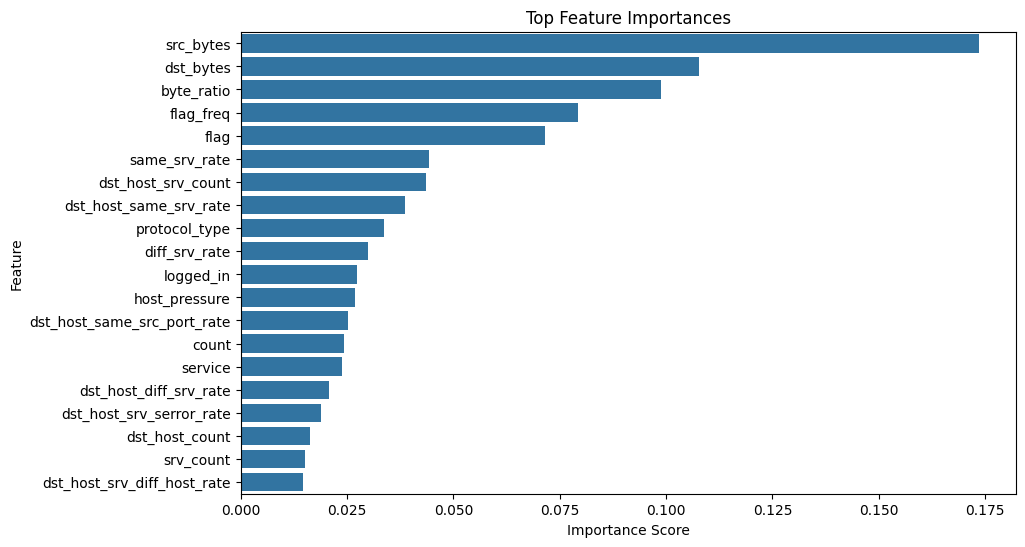

In [ ]:
feature_importance = pd.DataFrame({
    "feature": x_train.columns,
    "importance": rfcmodel.feature_importances_
}).sort_values(by="importance", ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance.head(20),x="importance",y="feature")
plt.title("Top Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


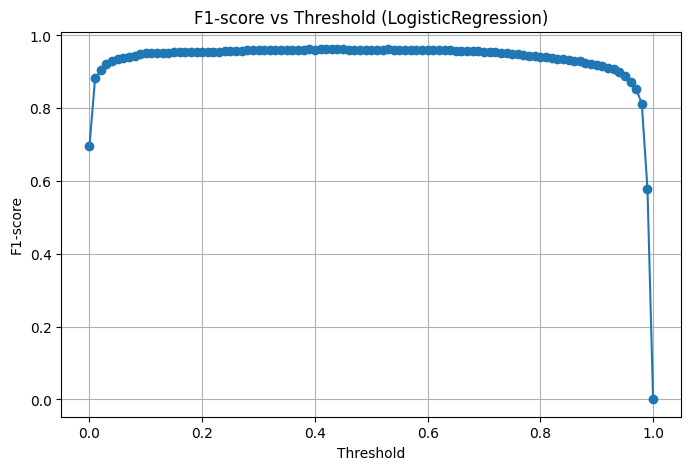

Best threshold: 0.42 with F1-score: 0.9622


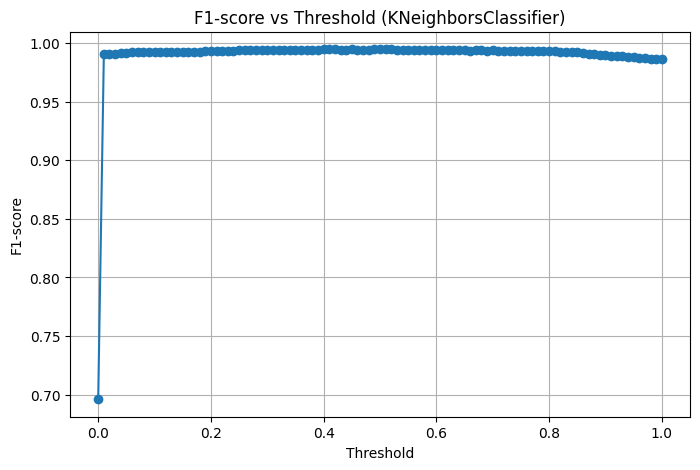

Best threshold: 0.40 with F1-score: 0.9948


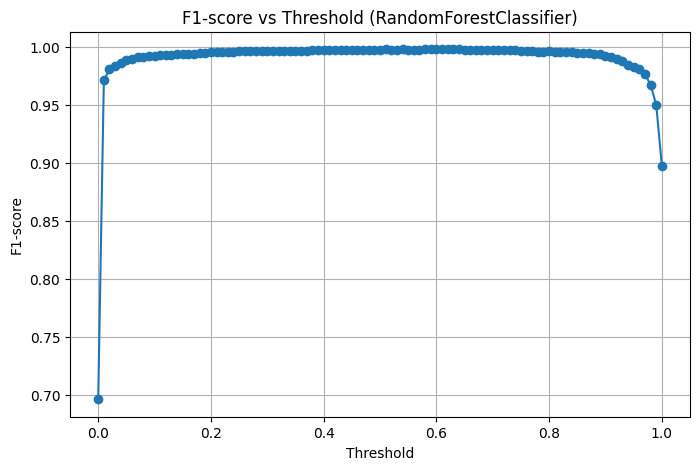

Best threshold: 0.58 with F1-score: 0.9984


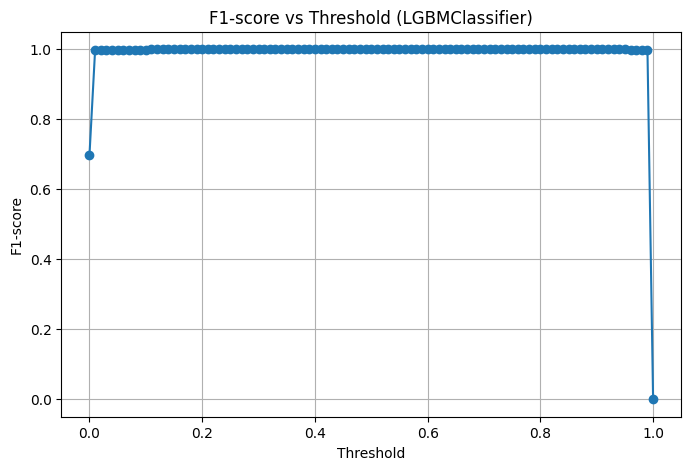

Best threshold: 0.36 with F1-score: 0.9988


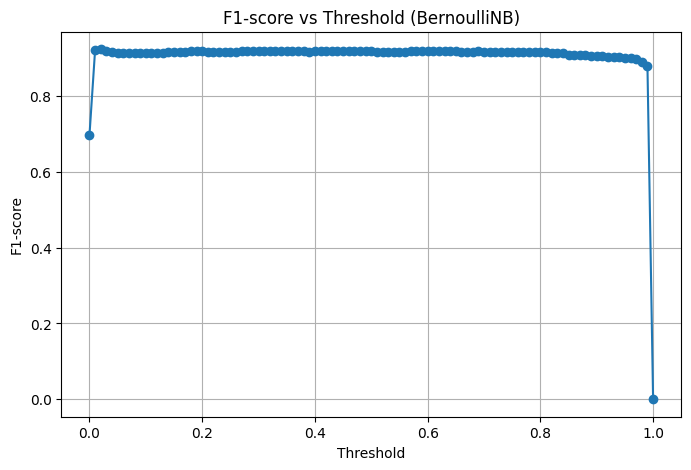

Best threshold: 0.02 with F1-score: 0.9232


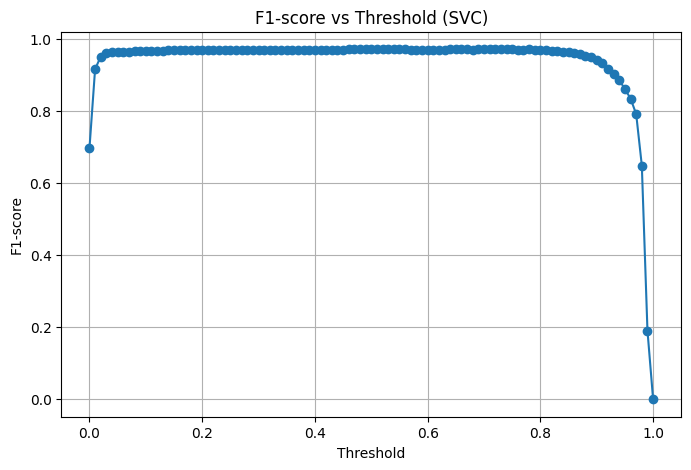

Best threshold: 0.48 with F1-score: 0.9709


In [ ]:
from sklearn.metrics import f1_score


def tune_threshold(model, X_val, y_val):
    y_probs = model.predict_proba(X_val)[:,1]

    thresholds = np.arange(0, 1.01, 0.01)
    best_thresh = 0.5
    best_f1 = 0
    f1_scores = []

    for t in thresholds:
        y_pred = (y_probs >= t).astype(int)
        f1 = f1_score(y_val, y_pred)
        f1_scores.append(f1)
        if f1 > best_f1:
            best_f1 = f1
            best_thresh = t

    plt.figure(figsize=(8,5))
    plt.plot(thresholds, f1_scores, marker='o')
    plt.xlabel("Threshold")
    plt.ylabel("F1-score")
    plt.title(f"F1-score vs Threshold ({model.__class__.__name__})")
    plt.grid(True)
    plt.show()

    print(f"Best threshold: {best_thresh:.2f} with F1-score: {best_f1:.4f}")
    return best_thresh, best_f1


y_test_enc = le.transform(y_test)
for name, model in models.items():
  tune_threshold(model,x_test,y_test_enc)


In [ ]:
for name, model in models.items():
  print(model.predict(test))

['anomaly' 'anomaly' 'normal' ... 'normal' 'normal' 'normal']
['anomaly' 'anomaly' 'normal' ... 'anomaly' 'normal' 'anomaly']
['anomaly' 'anomaly' 'normal' ... 'anomaly' 'normal' 'anomaly']
['anomaly' 'anomaly' 'normal' ... 'anomaly' 'normal' 'anomaly']
['anomaly' 'anomaly' 'normal' ... 'normal' 'normal' 'anomaly']
['anomaly' 'anomaly' 'normal' ... 'normal' 'normal' 'anomaly']
